# Welcome to the **2024** <img width="500px" src="media/spam-workshop.png"/>


## Spam Core Team:
 - Olga Stamati: olga.stamati@3sr-grenoble.fr
 - Emmanuel Roubin: emmanuel.roubin@3sr-grenoble.fr
 - Gustavo Pinzón: gustavo.pinzon-forero@esrf.fr
 - Edward Andò: edward.ando@epfl.ch

In [1]:
# imports
import numpy
import tifffile
import matplotlib.pyplot as plt
import scipy.ndimage
import spam.DIC

## Objectives
 - Sharing our knowledge and enjoyment of DVC
 - Have fun
 - Training you to use `spam`
 - Helping you advance on your different problems
 - Ideally recruit you into spam community to contribute!
 
 ## Remember
  - spam is 100% volunteer run
  - we're not making any money from this workshop
  - spam's survival depends on our motivation and your code contributions!

## Outline

- <tt>spam</tt>: a bit of history
- <tt>spam</tt>: more than just DVC (intro to functions and scripts)
- <tt>spam</tt>: speed vs installability
- <tt>spam</tt>: a bit of context
- DVC crash course
- Minimal maths background
- Most important spam scripts
- Input and output formats

## But first: Getting the most out of tomo Data

Congratulations, tomo data is huge and fantastic. Most people do such horribly simplistic analysis.
You're in the right place to start squeezing all the juice out of those Gigapixel images!

Remember: the non-desctructiveness of tomographic techniques means that we can hope to discover *processes* and not only *structures*!!

##  spam: a bit of history (1/3)

The setting: Laboratoire 3SR (CNRS, UGA, G-INP) in Grenoble
 - ~2006: Stephen Hall converts C-code seismic data correlator to DVC code (photo- and tomowarp)
 - 2008: Lab recieves a prototype RX-Solutions x-ray scanner
 - 2009: EA starts PhD
 - 2011: EA begins TomoWarp2 in python to parallelise and sanitise input (+settings file)
 

##  spam: a bit of history (2/3)

 - 2014: EA completes PhD and stays on as CNRS Research Engineer
 - 2016: OS starts masters thesis with EA and ER (+Yann Malecot)
 - 2017: OS starts PhD: "hétérogénéités + mécanique + béton + mésoscopique: tomographie + E-FEM" <a href="https://www.theses.fr/2020GRALI023">(read it!)</a>
 - 2019: ER and EA playing around trying to implement MMR from 2017 paper... implement convenient reg function! RandomWaffle is born


 ##  spam: a bit of history (3/3)


 - 2020: spam JOSS paper is put online 
 - 2022: EA moves to EPFL Center for Imaging
 - 2023: Spam Core team obtain ORD funding!
 - 2024: Right now: Spam workshop 1/2 in 2024 in ETHZ!

## Why "spam"??

 1. A canned meat product: <img width="200px" src="media/spam.png"/>
 2. Monty Python sketch (warning, chaotic and silly): <video controls width="200px" src="media/Spam - Monty Python's Flying Circus.mp4"/>
 3. New programming language after the Monty Pythons
 4. Random Waffle → Software for Practical Analysis of Materials

## spam: the state of the package

 - We have written things in C which are binded (bound?) with python.

 - This means distribution is a bore (trust us, we know).

 - Windows sucks.

 - We're working on it (with `numba`??)
 
 - <a href="https://pypi.org/project/spam/">to spam on pypi</a>

## <tt>spam</tt>: more than just DVC 

Spam includes much functionality that we've needed over time:

 - kalisphera
 - label toolkit
 - filters
 - random fields

## spam: a bit of context for DVC

Operational tool needed for analysis of (difficult) 3D x-ray tomo images.

**Design choice: images in memory**

DVC part (`spam.DIC` and `spam.deformation`) is big and well developed. Other DVC software out there:

Closed source ⇒ :(
 - LaVision
 - Avizo
 

## Context 2

Open source:
 - TomoWarp2 (Grenoble)
 - YaDICs (Lille)
 - Pyxel
 - elastics
 - ???
 - scikit-image
 
We are really in the sweet spot (we believe) of performance, adaptability, control and documentation.

We also have an active community (you!)

## Organisation of the package

In spam you can either use command-line scripts:

```bash
(spam) user@computer: spam-reg im1.tif im2.tif
```

Help is like this:

```bash
(spam) user@computer: spam-reg --help
```

OR include it in a python script

```python
import spam.DIC
reg = spam.DIC.register(im1, im2)
```

Documentation in `docstring` or online in module index.

## Before we start DVC

Terminology:
  - DVC = Digital Volume Correlation
  - Pixel size = geometric measurement of pixel dimensions (µm)
  - Number of pixels = dimensions of your volume X × Y × Z
  - Resolution = Formally-measured sharpness (µm)
  - Greylevel, Dynamic range, Bit depth
  - Synonyms: DVC, DIC, Optical Flow, Alignment, Registration, PIV, ...
  - ...?

## DVC Crash course:

Measuring motion from images – different techniques exist:

  - Identify objects and link frames (e.g., Hungarian Algorithm, idTrack...)
    <img width="350px" src="media/idTrack.jpg"/>
  - Keypoint detection and matching (e.g., SIFT)
    <img width="200px" src="media/SIFT.jpg"/>
  - Correlation ← We want this one

## Image correlation key points:

Three Greek letters:
 1. Definition (and minimisation) of an error criterion (η)
 2. Definition of a motion model (Φ)
 3. Definition of an integration zone (Ω)

### 1. Error criterion η

Metric for dissimilarity of two same-sized images?

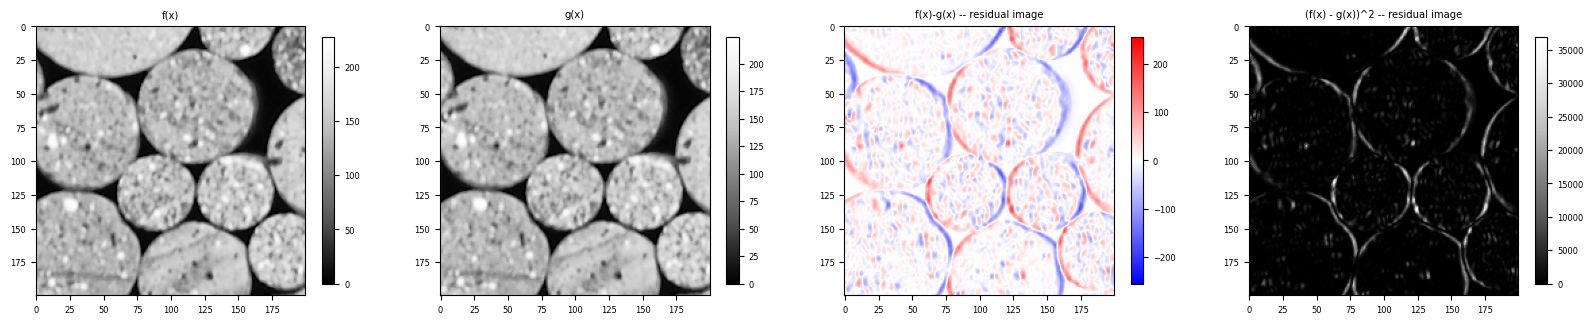

<f-g>: 0.44415    <(f-g)²>: 1262.5545


In [2]:
f = tifffile.imread("media/f(x)-small.tif").astype(float)
g = tifffile.imread("media/g(x)-small.tif").astype(float)
fig = plt.figure(figsize=(20,80))
plt.subplot(1,4,1); plt.imshow(f, cmap='Greys_r'); plt.title("f(x)"); plt.colorbar(shrink=0.04)
plt.subplot(1,4,2); plt.imshow(g, cmap='Greys_r'); plt.title("g(x)"); plt.colorbar(shrink=0.04)
plt.subplot(1,4,3); plt.imshow(f-g, cmap='bwr', vmin=-255, vmax=255); plt.title("f(x)-g(x) -- residual image"); plt.colorbar(shrink=0.04)
plt.subplot(1,4,4); plt.imshow(numpy.square(f-g), cmap='Greys_r'); plt.title("(f(x) - g(x))^2 -- residual image"); plt.colorbar(shrink=0.04)
plt.show()
print(f"<f-g>: {numpy.mean(f-g)}    <(f-g)²>: {numpy.mean((f-g)**2)}")

⇒ For gaussian noise $\eta^2 = \displaystyle \sum_{x\in\Omega}({f(x) - g(x))^2}$ is optimal

N.B. The "residual" (SQD image before summing) is super important.

## 2. Motion model

We're interested in describing movement with DVC how can we do this, and how can we apply it to f(x) or g(x)?

N.B. $x = \begin{bmatrix}{Y \\ X}\end{bmatrix}$

→ the $x$ in $f(x)$ is "all the pixel coordinates", so moving them is a start

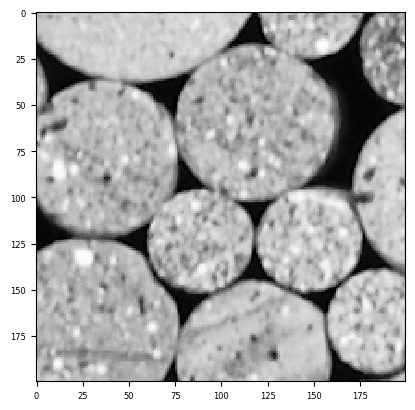

In [3]:
plt.imshow(f, cmap="Greys_r", interpolation='none'); plt.show()

In [4]:
# A 10x10 pixel image with area-detecting pixels and their centres as dots
N = M = 25
coords = numpy.mgrid[0:N, 0:M].reshape(2,-1).T
print(coords)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
plt.plot(coords[:,1], coords[:,0], '.')
plt.xticks(numpy.arange(0, N+1)-0.5)
plt.yticks(numpy.arange(0, M+1)-0.5)
ax.invert_yaxis(); ax.set_aspect(1.0); plt.grid(); plt.show()

[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [24 22]
 [24 23]
 [24 24]]


In [5]:
# Displacement
u = numpy.array([0.3, 0])

coordsDef = coords.copy() + u

fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(1,1,1); plt.xticks(numpy.arange(0, N+1)-0.5); plt.yticks(numpy.arange(0, M+1)-0.5); ax.invert_yaxis(); ax.set_aspect(1.0); plt.grid();
plt.plot(coords[:,1], coords[:,0], '.')
plt.quiver(
    coords[:,1], # x positions
    coords[:,0], # y positions
    (coordsDef-coords)[:,1], # x vector
    (coordsDef-coords)[:,0], # y vector
    angles='xy', scale_units='xy', scale=1
)
plt.show()

In [6]:
fDef = scipy.ndimage.map_coordinates(f, coordsDef.T).reshape(N,M)
plt.subplot(1,2,1)
plt.imshow(f[0:N, 0:M]) 
plt.subplot(1,2,2)
plt.imshow(fDef[0:N, 0:M])
plt.show()

## Are translations enough?

This depends on the complexity of the motion. In our experience no, unless motion is really tiny.

This depends quite a lot on your experimental setup too.

### Image translation

We modified the coords → coordsDef by adding vector $\vec{u}$.

We looked up those new positions in the image and created a new NxM image.

How about rotations? We can't just add a vector...

We're going to do $x' = R.x$

$ R = \begin{bmatrix}cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \\\end{bmatrix}$

In [7]:
# Rotation, 4 degs
r = numpy.deg2rad(4)
R = numpy.array([
    [numpy.cos(r), -numpy.sin(r)],
    [numpy.sin(r), numpy.cos(r)],
])

coordsDef = numpy.zeros_like(coords, dtype=float)
for i in range(coords.shape[0]):
    coordsDef[i] = numpy.dot(R, coords[i])

fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(1,1,1); plt.plot(coords[:,1], coords[:,0], '.'); plt.xticks(numpy.arange(0, N+1)-0.5); plt.yticks(numpy.arange(0, M+1)-0.5)
plt.quiver(
    coords[:,1],
    coords[:,0],
    (coordsDef-coords)[:,1],
    (coordsDef-coords)[:,0],
    angles='xy', scale_units='xy', scale=1
)
ax.invert_yaxis(); ax.set_aspect(1.0); plt.grid(); plt.show()

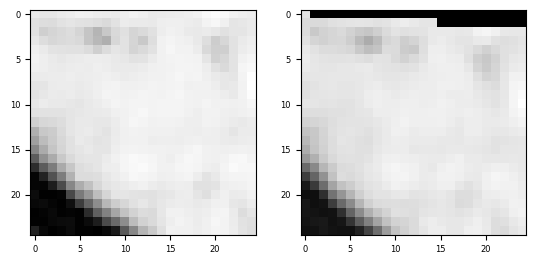

In [8]:
fDef = scipy.ndimage.map_coordinates(f, coordsDef.T).reshape(N,M)
plt.subplot(1,2,1)
plt.imshow(f[0:N, 0:M])
plt.subplot(1,2,2)
plt.imshow(fDef)
plt.show()

OK cool by multiplying by a rotation matrix we can rotate around the origin...

**N.B. Interpolation, this is important!!**

In 3D $R$ is a 3x3 matrix that represents the rotation. It can be described by:

 - 3 euler angles :(
 - Axis and Angle ⇒ "Rotation Vector"
 - Quaternions

The maths that will follow will be a mess if we have to do $x' = R.x + \vec{u}$

# Strain example with changing zoom

⇒ Nice "trick": use homogeneous coordinates

$Φ.x = \begin{bmatrix}F_\text{1,1} & F_\text{1,2} & t_y \\ F_\text{2,1} & F_\text{2,2} & t_x \\ 0 & 0 & 1\end{bmatrix}\cdot \begin{bmatrix}Y \\ X \\ 1\end{bmatrix} = x' $

or in 3D:

$Φ.x = \begin{bmatrix}F_\text{1,1} & F_\text{1,2} & F_\text{1,3} & t_z \\ F_\text{2,1} & F_\text{2,2} & F_\text{2,3}& t_y \\ F_\text{3,1} & F_\text{3,2} & F_\text{3,3}& t_x \\ 0 & 0 & 0 & 1\end{bmatrix}\cdot \begin{bmatrix}Z \\Y \\ X \\ 1\end{bmatrix} = x' $

N.B. in spam we have the origin at the middle of the image!

In [9]:
import spam.DIC
import spam.deformation
Phi = spam.deformation.computePhi({
    't': [0, 0.3, 0],
    'r': [0, 0, 0],
    'z': [1, 0.8, 1.2]
})
print(Phi)
plt.imshow(spam.DIC.applyPhiPython(f, Phi=Phi, interpolationOrder=0))
plt.show()

[[1.  0.  0.  0. ]
 [0.  0.8 0.  0.3]
 [0.  0.  1.2 0. ]
 [0.  0.  0.  1. ]]


### Manipulating Phi

Phi is a 4x4 matrix, not obvious to manipulate... we provide:

`spam.deformation.decomposePhi()`

Translation is easy, then $F = RU$...

In [10]:
spam.deformation.decomposePhi(Phi)

{'t': array([0. , 0.3, 0. ]),
 'r': [0.0, 0.0, 0.0],
 'z': [1.0, 0.8, 1.2],
 'U': array([[1. , 0. , 0. ],
        [0. , 0.8, 0. ],
        [0. , 0. , 1.2]]),
 'e': array([[ 0. ,  0. ,  0. ],
        [ 0. , -0.2,  0. ],
        [ 0. ,  0. ,  0.2]]),
 'vol': -0.040000000000000036,
 'dev': 0.28769804741088595,
 'volss': 0.0,
 'devss': 0.28284271247461895}

### Motion model conclusion 

Our motion model ⇒ Φ (or mesh w/ displacements, see later)

## 3. Last ingredient, integration zone Ω!

We're searching for a Phi such that:

$Φ_{opt} = \text{argmin}(\eta(Φ)^2) = $

where:

$\eta(Φ)^2 = \displaystyle \sum_{x\in\Omega}(g(Φ.x) - f(x))^2$





## Philosophy slide about getting Ω right

- appropriate size (whole image / details)
- appropriate shape
- appropriate scale

Question: Difference between 2D (image) and 3D (volume) correlation?

An example of details (Ω = box):
<img height="800px" src="media/regularGridSmall.png"/>

Another example of details (Ω = grain):
<img height="800px" src="media/discrete.png"/>

## Finding Φ...

How to find Φ?

 - Brute force
 - Lucas and Kanade (1981) iterative algorithm

## Iterative approach to finding Φ

We compute an update to Φ called δΦ:

$\mathcal{T}(\boldsymbol{\widetilde \Phi}) = \frac{1}{2} \sum_{x \in \Omega} \left(f(x) - g(\boldsymbol{\widetilde \Phi}\cdot x)\right)^2$


Newton scheme to computing δΦ:

$g(\Phi^{(n+1)}\cdot x) = g(\Phi^{(n)}\cdot x)+\nabla g(\Phi^{(n)}\cdot x)\cdot\delta\Phi^{(n+1)}\cdot\Phi^{(n)}\cdot(x)$


Rewritten as:
$M^{(n)}\delta\Phi^{(n+1)} = A^{(n)}$

...solve for δΦ and iterate until it is small ⇒ RETURN STATUS = 2!

Iterative method can be VERY accurate, but needs good initial guess (1/2 texture amplitude)

Start correlation with Error = 10.46


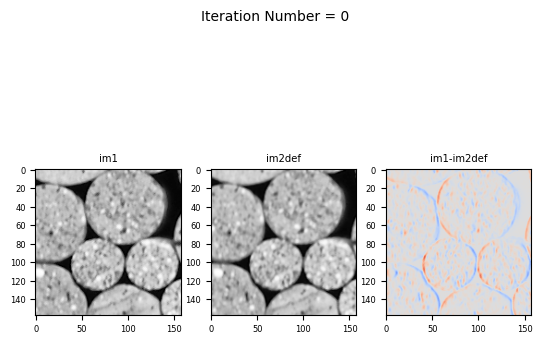

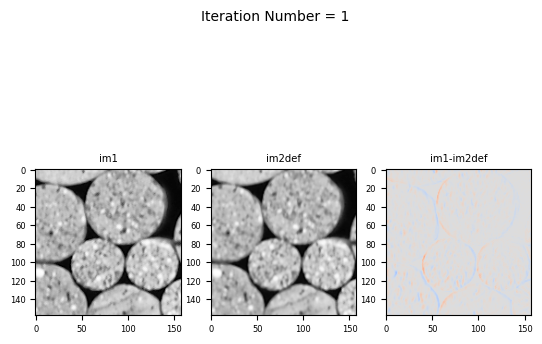

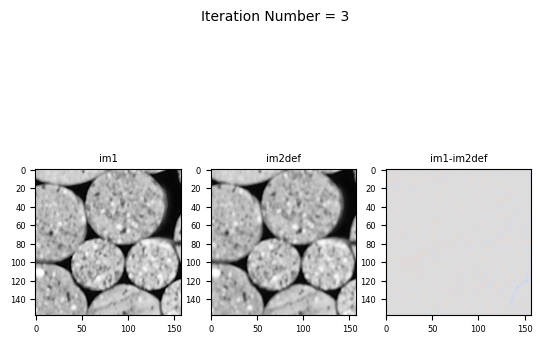

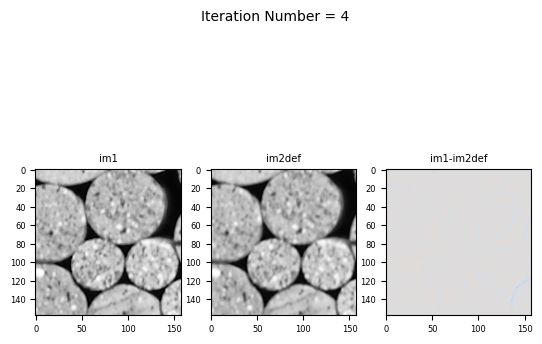

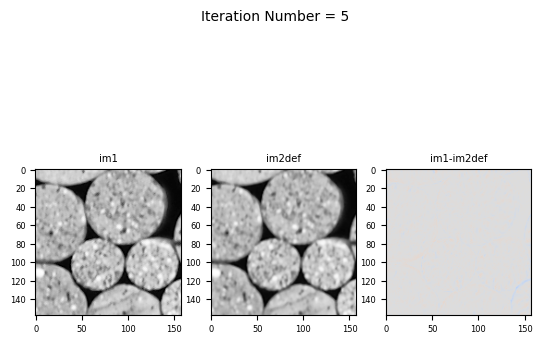

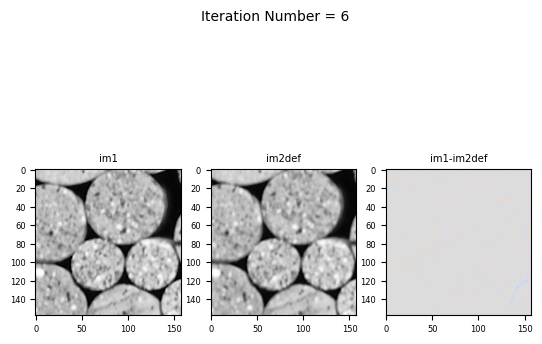


	 -> Converged


In [13]:
reg = spam.DIC.register(f, g, verbose=True, imShowProgress=1)

In [14]:
# Let's look at the output...
print("-- reg --")
for k in reg:
    print(f"    {k}: {reg[k]}")

# Eddy's first Walrus!
print("\n\n-- PhiDecomposed --")
for k in (Phi := spam.deformation.decomposePhi(reg['Phi'])):
    print(f"    {k}: {Phi[k]}")

-- reg --
    error: 0.22443322837352753
    Phi: [[ 1.     0.     0.     0.   ]
 [ 0.     1.001  0.003 -0.501]
 [ 0.    -0.003  0.998  3.624]
 [ 0.     0.     0.     1.   ]]
    returnStatus: 2
    iterations: 7
    deltaPhiNorm: 0.0006619162126454322


-- PhiDecomposed --
    t: [ 0.    -0.501  3.624]
    r: [-0.154  0.     0.   ]
    z: [1.0, 1.000936835086618, 0.9982867465420233]
    U: [[ 1.     0.     0.   ]
 [ 0.     1.001 -0.   ]
 [ 0.    -0.     0.998]]
    e: [[ 0.     0.     0.   ]
 [ 0.     0.001 -0.   ]
 [ 0.    -0.    -0.002]]
    vol: -0.0007780336704781288
    dev: 0.0019064019379900438
    volss: -0.0007836060277912615
    devss: 0.0019063973134027343


## Iterative method

Notes:
  - Initial guess super important
  - Convergence necessary (but not sufficient to trust result)
  - If Φ does not describe motion ⇒ convergence will be bad
  - Interest of multiscale
  - Look at _residual_ if Φ describes motion well this should be noise + recon
  - How do we "undo" Φ?

# Input and output formats:

Input:
  - 3D TIFF files
  
Output:
  - 3D TIFF files (deformed images and ldic results)
  - TSV files (example reg and ldic)
  - VTK files (paraview example)

## Key measurement scripts
Average
 - spam-ereg
 - spam-reg
 - spam-mmr

Detailed

 - spam-pixelSearch
 - spam-gdic
 - spam-ldic
 - spam-ddic

# Key helpers scripts
 - spam-deformImage
 - spam-moveLabels
 - spam-filterPhiField
 - spam-passPhiField
 - spam-regularStrain


# Workflows

We have two images, how will we describe the difference between them? By aligning them (right?)

How will we check the quality of a potential alignment?

1. By eye (switching between) Φ@REF and DEF
2. Looking at η or η^2

## Typical workflow 1
</br>
</br>
<img width="1000px" src="media/workflow.png"/>
</br>

# Over to you for questions!

Let's get started!